In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# import libraries for plotting
import matplotlib.pyplot as plt
import seaborn as sns
# from matplotlib import pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
pd.set_option('display.max_rows', 500)
pd.options.display.float_format = '{:,.2f}'.format
RANDOM_STATE = 42
from datetime import date

In [2]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.cluster import KMeans
###Products

In [3]:
df_products = pd.read_csv('sociodemographic_df.csv')

In [4]:
df_products.head().T

,0,1,2,3,4
Unnamed: 0,0,1,2,3,4
pk_cid,1375586,1050611,1050612,1050613,1050614
pk_partition,2018-01-28,2018-01-28,2018-01-28,2018-01-28,2018-01-28
country_id,ES,ES,ES,ES,ES
region_code,29.00,13.00,13.00,50.00,50.00
gender,H,V,V,H,V
age,35,23,23,22,23
deceased,N,N,N,N,N
salary,"87,218.10","35,548.74","122,179.11","119,775.54",NaN


In [5]:
df_products.describe()

,Unnamed: 0,pk_cid,region_code,age,salary
count,"5,962,924.00","5,962,924.00","5,960,660.00","5,962,924.00","4,450,821.00"
mean,"7,155,425.01","1,234,929.80",25.81,29.76,"115,816.72"
std,"3,920,784.28","162,302.04",13.60,11.98,"199,551.89"
min,0.00,"15,891.00",1.00,2.00,"1,202.73"
25%,"4,240,385.75","1,112,532.00",13.00,22.00,"61,500.63"
50%,"7,499,346.50","1,231,097.00",28.00,25.00,"88,654.65"
75%,"10,201,422.25","1,352,339.00",36.00,34.00,"131,669.91"
max,"13,647,308.00","1,553,689.00",52.00,105.00,"28,894,395.51"


In [6]:
df_products['salary'].fillna(value='nada', inplace=True)

In [7]:
df_products = df_products[df_products['salary'] != 'nada']

In [8]:
df_products['region_code'].fillna(value='nada', inplace=True)

In [9]:
df_products = df_products[df_products['region_code'] != 'nada']

In [10]:
df_products.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4450784 entries, 0 to 5962922
Data columns (total 9 columns):
 #   Column        Dtype 
---  ------        ----- 
 0   Unnamed: 0    int64 
 1   pk_cid        int64 
 2   pk_partition  object
 3   country_id    object
 4   region_code   object
 5   gender        object
 6   age           int64 
 7   deceased      object
 8   salary        object
dtypes: int64(3), object(6)
memory usage: 339.6+ MB


In [11]:
df_products['salary'] = df_products['salary'].astype(int)

In [12]:
df_products['region_code'] = df_products['region_code'].astype(int)

In [13]:
df_products['country_id'].value_counts()

ES    4450784
Name: country_id, dtype: int64

In [14]:
df_products['age'].describe()

count   4,450,784.00
mean           29.96
std            12.01
min             2.00
25%            22.00
50%            25.00
75%            34.00
max           105.00
Name: age, dtype: float64

In [15]:
reduce_df_products = ['region_code', 'salary', 'age']

In [16]:
reduce_df = df_products[reduce_df_products]

In [17]:
reduce_df.head(5).T

,0,1,2,3,5
region_code,29,13,13,50,45
salary,87218,35548,122179,119775,22220
age,35,23,23,22,23


In [18]:
reduce_df.describe()

,region_code,salary,age
count,"4,450,784.00","4,450,784.00","4,450,784.00"
mean,25.73,"115,815.73",29.96
std,13.61,"199,552.39",12.01
min,1.00,"1,202.00",2.00
25%,13.00,"61,499.00",22.00
50%,28.00,"88,654.00",25.00
75%,36.00,"131,669.00",34.00
max,52.00,"28,894,395.00",105.00


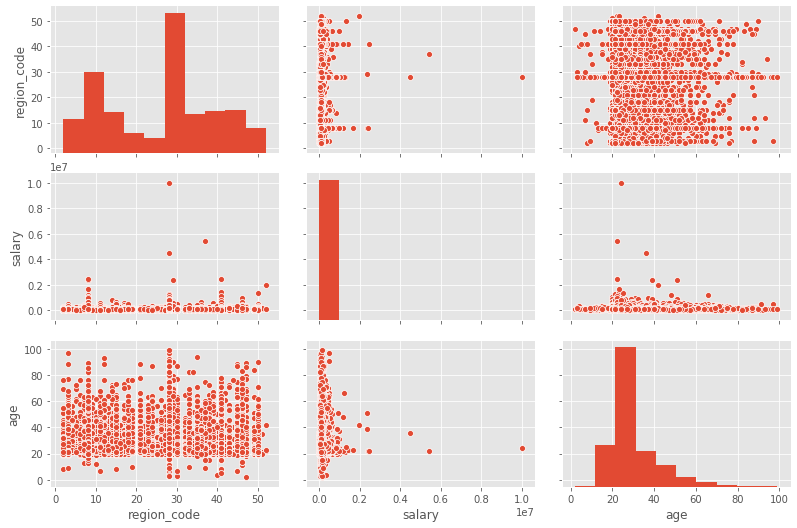

In [19]:
sns.pairplot(reduce_df.sample(10000), aspect=1.5)
plt.savefig("SC_0.png")

In [20]:

reduce_df['region'] = pd.qcut(reduce_df['region_code'], q=5, labels=range(5))

C:\Users\evive\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [21]:
reduce_df['salario'] = pd.qcut(reduce_df['salary'], q=5, labels=range(5))

C:\Users\evive\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [22]:
reduce_df['edad'] = pd.qcut(reduce_df['age'], q=5, labels=range(5))

C:\Users\evive\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [23]:
reduce_df.head(5).T

,0,1,2,3,5
region_code,29,13,13,50,45
salary,87218,35548,122179,119775,22220
age,35,23,23,22,23
region,3,1,1,4,4
salario,2,0,3,3,0
edad,3,1,1,0,1


In [24]:
reduce_df.pivot_table(index='salario', values=['region_code'], aggfunc=[len, np.median])


,len,median
,region_code,region_code
salario,,
0,890176,28
1,890169,28
2,890137,28
3,890156,28
4,890146,28


In [25]:
reduce_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4450784 entries, 0 to 5962922
Data columns (total 6 columns):
 #   Column       Dtype   
---  ------       -----   
 0   region_code  int32   
 1   salary       int32   
 2   age          int64   
 3   region       category
 4   salario      category
 5   edad         category
dtypes: category(3), int32(2), int64(1)
memory usage: 274.6 MB


In [26]:
cruce_table = pd.crosstab(reduce_df['edad'], reduce_df['salario'])


In [27]:
cruce_table

salario,0,1,2,3,4
edad,,,,,
0,255562,258229,254570,259956,263586
1,110510,108747,107153,110136,113788
2,192270,178715,174630,167245,171899
3,189602,186743,184052,171130,155633
4,142232,157735,169732,181689,185240


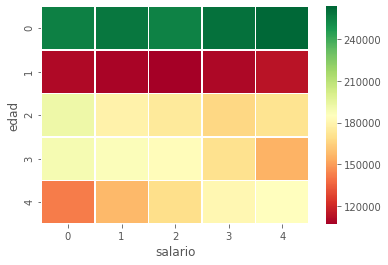

In [28]:
sns.heatmap(cruce_table, cmap='RdYlGn', linewidths=0.5)
plt.savefig("SC_1.png")

In [29]:
pipe = Pipeline(
        steps=[
            ('StandardScaler', StandardScaler()),
            ('KMeans', KMeans(n_clusters=8))
        ]
)

In [30]:
pipe.fit(reduce_df[['salary', 'region_code', 'age']])

Pipeline(memory=None,
         steps=[('StandardScaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('KMeans',
                 KMeans(algorithm='auto', copy_x=True, init='k-means++',
                        max_iter=300, n_clusters=8, n_init=10, n_jobs=None,
                        precompute_distances='auto', random_state=None,
                        tol=0.0001, verbose=0))],
         verbose=False)

In [31]:
Pipeline(memory=None,
         steps=[('StandardScaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('KMeans',
                 KMeans(algorithm='auto', copy_x=True, init='k-means++',
                        max_iter=300, n_clusters=8, n_init=10, n_jobs=None,
                        precompute_distances='auto', random_state=None,
                        tol=0.0001, verbose=0))],
         verbose=False)


Pipeline(memory=None,
         steps=[('StandardScaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('KMeans',
                 KMeans(algorithm='auto', copy_x=True, init='k-means++',
                        max_iter=300, n_clusters=8, n_init=10, n_jobs=None,
                        precompute_distances='auto', random_state=None,
                        tol=0.0001, verbose=0))],
         verbose=False)

In [32]:
pipe

Pipeline(memory=None,
         steps=[('StandardScaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('KMeans',
                 KMeans(algorithm='auto', copy_x=True, init='k-means++',
                        max_iter=300, n_clusters=8, n_init=10, n_jobs=None,
                        precompute_distances='auto', random_state=None,
                        tol=0.0001, verbose=0))],
         verbose=False)

In [33]:
reduce_df['Cluster'] = pipe.predict(reduce_df[['salary', 'region_code', 'age']])


C:\Users\evive\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [34]:
reduce_df['Cluster']

0          3
1          5
2          5
3          2
5          2
          ..
5962917    2
5962918    2
5962919    2
5962920    1
5962922    2
Name: Cluster, Length: 4450784, dtype: int32

In [35]:
reduce_df.groupby('Cluster').agg({
    'salary': 'mean',
    'region_code': 'median',
    'age': 'median'
})

,salary,region_code,age
Cluster,,,
0,"753,267.76",28,24
1,"114,298.56",28,23
2,"91,962.44",46,23
3,"106,331.68",28,41
4,"23,559,931.15",28,26
5,"102,921.86",8,23
6,"7,760,766.36",28,25
7,"126,133.36",28,60


In [36]:
from scipy.stats import scoreatpercentile

from statsmodels.compat.pandas import Substitution
from statsmodels.sandbox.nonparametric import kernels

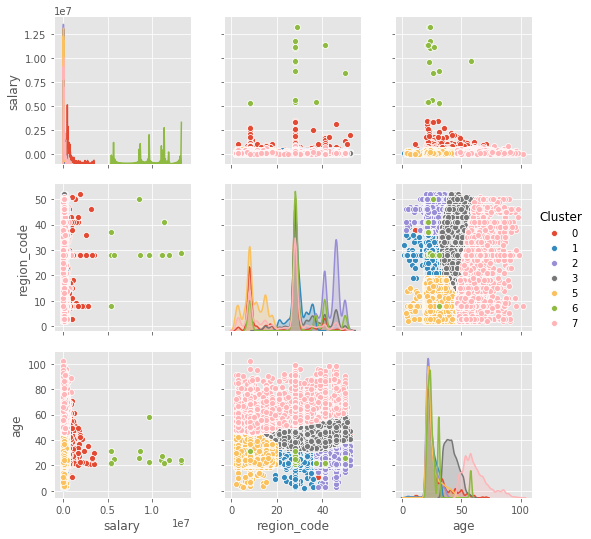

In [37]:

sns.pairplot(reduce_df.sample(50000), vars=['salary', 'region_code', 'age'], hue='Cluster', diag_kws={'bw': 0.8})
plt.savefig("SC_2.png")
plt.show()


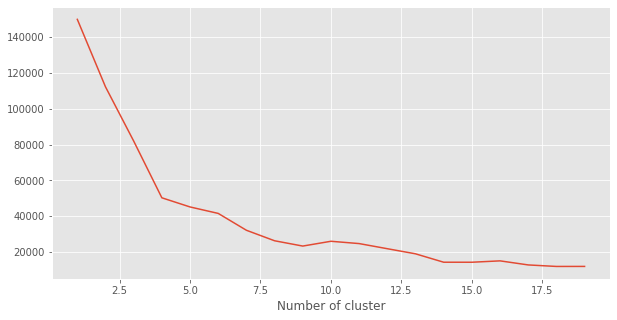

In [38]:
sse = {}
for k in range(1, 20):
    pipe = Pipeline(
            steps=[
                ('StandardScaler', StandardScaler()),
                ('KMeans', KMeans(n_clusters=k))
            ]
        ).fit(reduce_df.sample(50000)[['salary', 'region_code', 'age']])
    reduce_df.sample(50000)['Cluster'] = pipe['KMeans'].labels_
    sse[k] = pipe['KMeans'].inertia_
    
plt.figure(figsize=(10, 5))
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel('Number of cluster')
plt.savefig("SC_3.png")
plt.show()

In [39]:
from sklearn.cluster import DBSCAN

In [40]:
#Selection of numerical variables for DBSCAN
Data_DBSCAN = reduce_df.sample(50000)[['salary', 'region_code', 'age']]

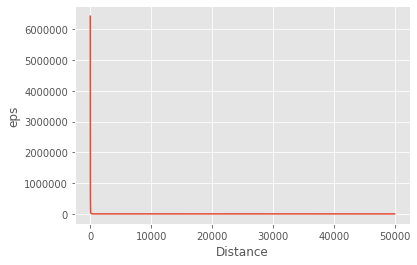

In [41]:
from sklearn.neighbors import NearestNeighbors
nbrs=NearestNeighbors().fit(Data_DBSCAN)
distances, indices = nbrs.kneighbors(Data_DBSCAN,20)
kDis = distances[:,10]
kDis.sort()
kDis = kDis[range(len(kDis)-1,0,-1)]
plt.plot(range(0,len(kDis)),kDis)
plt.xlabel('Distance')
plt.ylabel('eps')
plt.show()

In [42]:
from sklearn.cluster import DBSCAN
dbs_1= DBSCAN(eps=0.035, min_samples=4)
results = dbs_1.fit(Data_DBSCAN).labels_

In [43]:
results

array([-1, -1, -1, ..., -1, -1, -1], dtype=int64)

-1    49971
 3        5
 6        4
 5        4
 4        4
 2        4
 1        4
 0        4
Name: Cluster, dtype: int64


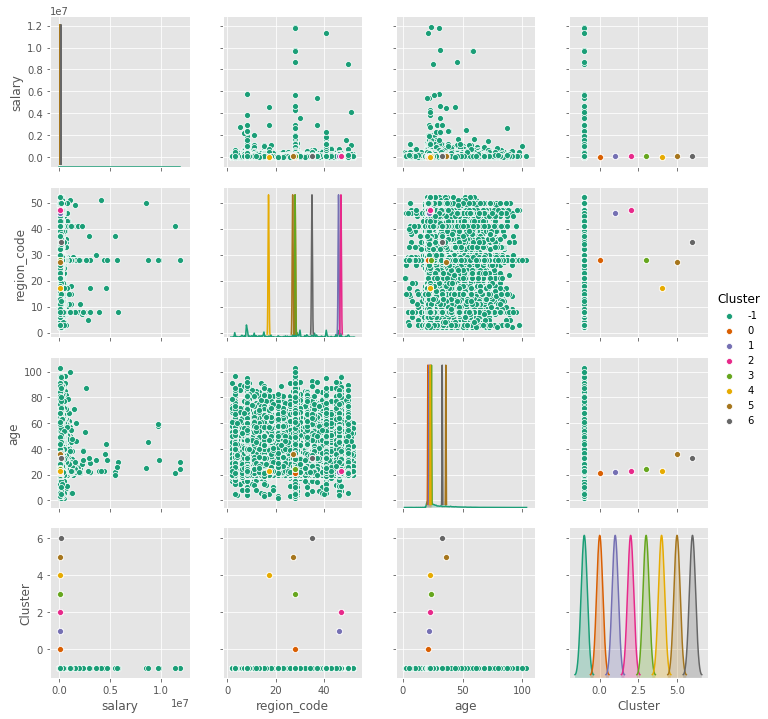

In [44]:
#Visualize DBSCAN clustering 
df_DBSCAN=Data_DBSCAN
df_DBSCAN['Cluster'] = dbs_1.fit(Data_DBSCAN).labels_
print (df_DBSCAN['Cluster'].value_counts())
sns.pairplot(df_DBSCAN,hue='Cluster',palette='Dark2',diag_kws={'bw': 0.2})
plt.savefig("SC_4.png")

In [45]:
###Vemos que el modelo DBSCAN, no aporta mucho, pero queriamos utilizar otro algorimo, ademas del K-Means

In [46]:
df_total = pd.read_csv('df_banc_rev.csv')


In [47]:
df2 = df_total[['region_code', 'salary', 'age', 'revenue_total', 'unidades_vendidas_total']]

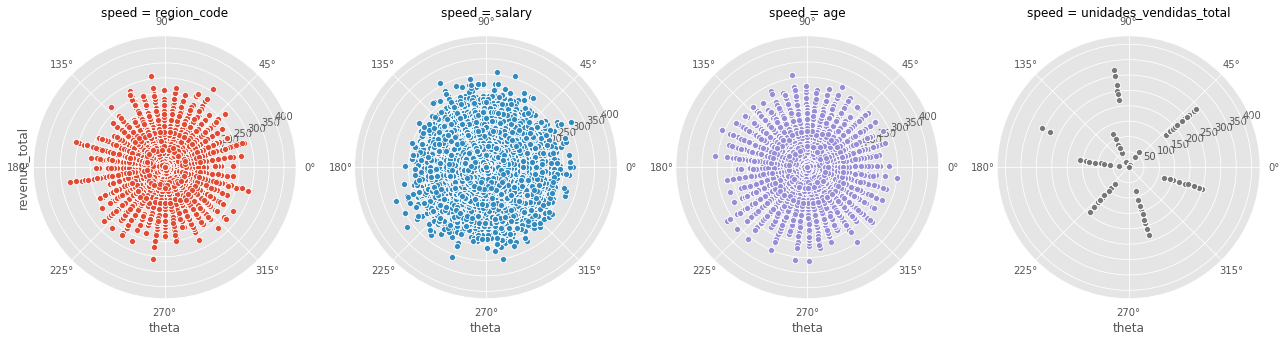

In [48]:
# Generate an example radial datast
r = np.linspace(0, 10, num=100)
df = pd.DataFrame({'revenue_total': r, 'slow': r, 'medium': 2 * r, 'fast': 4 * r})

# Convert the dataframe to long-form or "tidy" format
df = pd.melt(df2, id_vars=['revenue_total'], var_name='speed', value_name='theta')

# Set up a grid of axes with a polar projection
g = sns.FacetGrid(df, col="speed", hue="speed",
                  subplot_kws=dict(projection='polar'), height=4.5,
                  sharex=False, sharey=False, despine=False)

# Draw a scatterplot onto each axes in the grid
g.map(sns.scatterplot, "theta", "revenue_total")
g.savefig("SC_14.png")


In [49]:
reduce_df_products = df_total[['region_code', 'salary', 'age', 'revenue_total', 'unidades_vendidas_total']]

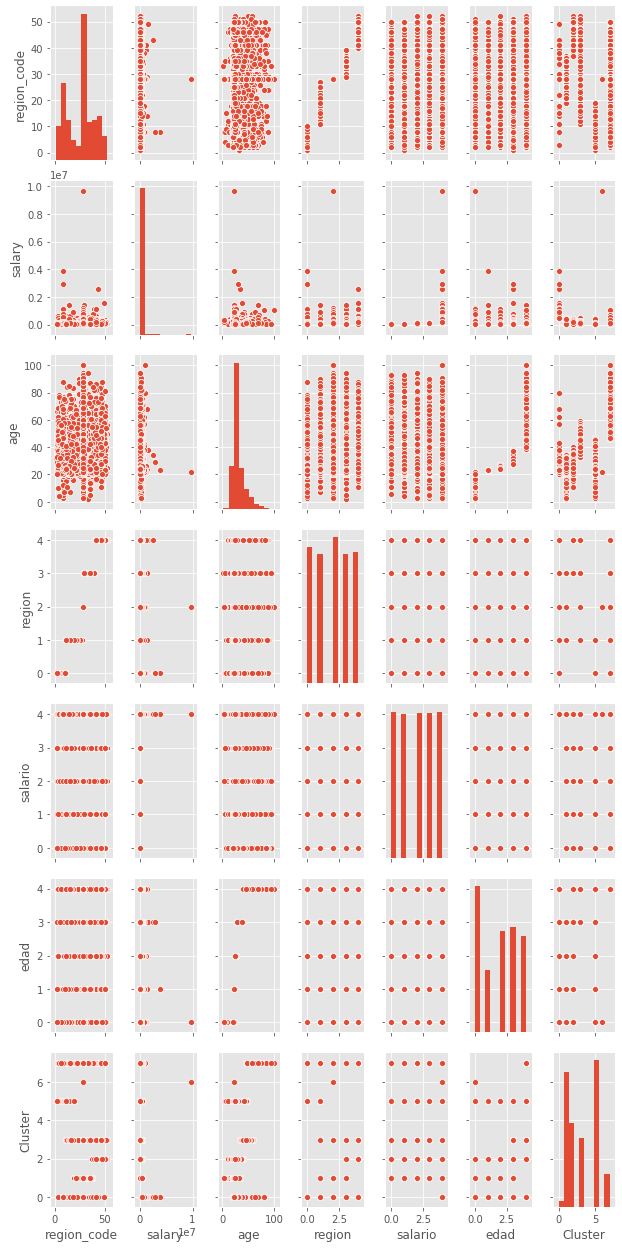

In [50]:
sns.pairplot(reduce_df.sample(10000), aspect=0.5)
plt.savefig("SC_15.png")

In [51]:
reduce_df['region'] = pd.qcut(reduce_df_products['region_code'], q=5, labels=range(5))

C:\Users\evive\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [52]:
reduce_df['salario'] = pd.qcut(reduce_df_products['salary'], q=5, labels=range(5))

C:\Users\evive\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [53]:
labels = ['numbers_25q','numbers_50q', 'numbers_75q', 'numbers_100q']

In [54]:
quantiles = [.0,0.25,.5,.75,1.]

In [55]:
reduce_df['edad'] = pd.qcut(reduce_df_products['age'], q=5, labels=range(5))

C:\Users\evive\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [56]:
reduce_df['ingresos'] = pd.qcut(reduce_df_products['revenue_total'], q=2, labels=range(2))

C:\Users\evive\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [57]:
reduce_df['ventas'] = pd.qcut(reduce_df_products['unidades_vendidas_total'], q=2, labels=range(2))

In [58]:
pipe = Pipeline(
        steps=[
            ('StandardScaler', StandardScaler()),
            ('KMeans', KMeans(n_clusters=8))
        ]
)

In [59]:
reduce_df_products.head(5).T

,0,1,2,3,4
region_code,28.00,28.00,28.00,28.00,28.00
salary,"113,652.32","113,652.32","113,652.32","113,652.32","113,652.32"
age,59.00,59.00,62.00,62.00,62.00
revenue_total,0.00,10.00,0.00,0.00,0.00
unidades_vendidas_total,0.00,1.00,0.00,0.00,0.00


In [60]:
reduce_df_products.pivot_table(index='salary', values=['region_code'], aggfunc=[len, np.median])


,len,median
,region_code,region_code
salary,,
"10,018.41",17.00,49.00
"10,156.26",17.00,13.00
"10,176.75",11.00,13.00
"10,233.63",17.00,30.00
"10,254.21",17.00,32.00
...,...,...
"4,629,866.49",11.00,41.00
"4,662,216.48",28.00,28.00


In [61]:
cruce_table = pd.crosstab(reduce_df_products['age'], reduce_df_products['revenue_total'])

In [62]:
cruce_table

revenue_total,0.00,10.00,20.00,30.00,40.00,50.00,60.00,70.00,80.00,90.00,...,230.00,240.00,250.00,260.00,270.00,280.00,290.00,300.00,310.00,320.00
age,,,,,,,,,,,,,,,,,,,,,
2,677,7,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1526,2,0,0,1,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2187,11,0,0,11,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,2905,6,0,0,9,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,3029,0,0,0,13,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,2185,0,0,0,5,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,2196,0,0,0,20,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,2446,1,0,0,13,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10,2219,9,0,0,10,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [63]:
cruce_table1 = pd.crosstab(reduce_df_products['age'], reduce_df_products['unidades_vendidas_total'])

In [64]:
cruce_table1

unidades_vendidas_total,0.00,1.00,2.00,3.00,4.00,5.00,6.00,7.00,8.00,9.00
age,,,,,,,,,,
2,677,7,0,0,0,0,0,0,0,0
3,1526,3,2,0,0,0,0,0,0,0
4,2187,22,0,0,0,0,0,0,0,0
5,2905,15,0,0,0,0,0,0,0,0
6,3029,13,0,0,0,0,0,0,0,0
7,2185,5,1,0,0,0,0,0,0,0
8,2196,20,0,0,0,0,0,0,0,0
9,2446,14,1,0,0,0,0,0,0,0
10,2219,19,1,0,0,0,0,0,0,0


In [65]:
reduce_df_products.isnull().sum()

region_code                2264
salary                        0
age                           0
revenue_total                 0
unidades_vendidas_total       0
dtype: int64

In [66]:
reduce_df_products['region_code'].fillna(value=0,inplace=True)

C:\Users\evive\anaconda3\lib\site-packages\pandas\core\generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [67]:
pipe.fit(reduce_df_products[['salary', 'region_code', 'age','revenue_total','unidades_vendidas_total']])

Pipeline(memory=None,
         steps=[('StandardScaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('KMeans',
                 KMeans(algorithm='auto', copy_x=True, init='k-means++',
                        max_iter=300, n_clusters=8, n_init=10, n_jobs=None,
                        precompute_distances='auto', random_state=None,
                        tol=0.0001, verbose=0))],
         verbose=False)

In [68]:
Pipeline(memory=None,
         steps=[('StandardScaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('KMeans',
                 KMeans(algorithm='auto', copy_x=True, init='k-means++',
                        max_iter=300, n_clusters=8, n_init=10, n_jobs=None,
                        precompute_distances='auto', random_state=None,
                        tol=0.0001, verbose=0))],
         verbose=False)


Pipeline(memory=None,
         steps=[('StandardScaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('KMeans',
                 KMeans(algorithm='auto', copy_x=True, init='k-means++',
                        max_iter=300, n_clusters=8, n_init=10, n_jobs=None,
                        precompute_distances='auto', random_state=None,
                        tol=0.0001, verbose=0))],
         verbose=False)

In [69]:
reduce_df_products['Cluster'] = pipe.predict(reduce_df_products[['salary', 'region_code', 'age','revenue_total','unidades_vendidas_total']])

C:\Users\evive\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [70]:
reduce_df_products['Cluster']

0          2
1          2
2          2
3          2
4          2
          ..
5956506    2
5956507    7
5956508    0
5956509    2
5956510    0
Name: Cluster, Length: 5956511, dtype: int32

In [71]:
reduce_df_products.groupby('Cluster').agg({
    'salary': 'mean',
    'region_code': 'median',
    'age': 'median',
    'revenue_total': 'mean',
    'unidades_vendidas_total':'median'
})

,salary,region_code,age,revenue_total,unidades_vendidas_total
Cluster,,,,,
0,"107,562.56",28.00,23,7.25,1.00
1,"113,549.72",28.00,37,134.97,4.00
2,"111,741.38",28.00,52,10.52,1.00
3,"100,818.71",8.00,23,8.54,1.00
4,"437,171.53",28.00,24,11.05,1.00
5,"106,911.33",28.00,36,66.45,2.00
6,"2,038,356.50",28.00,25,22.41,1.00
7,"94,496.37",45.00,23,9.02,1.00


In [72]:
from scipy.stats import scoreatpercentile

from statsmodels.compat.pandas import Substitution
from statsmodels.sandbox.nonparametric import kernels

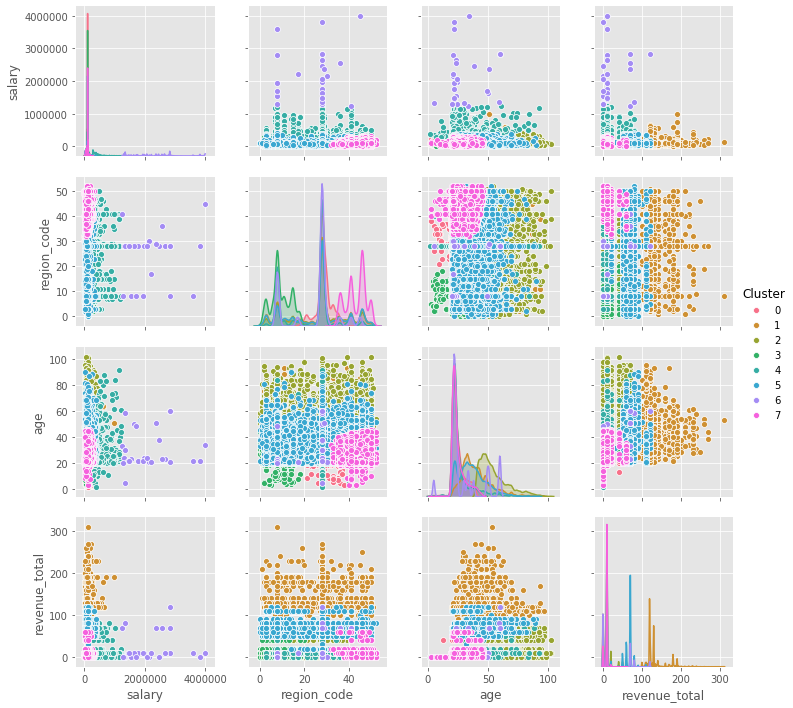

In [73]:
sns.pairplot(reduce_df_products.sample(50000), vars=['salary', 'region_code', 'age','revenue_total'], hue='Cluster', diag_kws={'bw': 0.8})
plt.savefig("SC_30.png")
plt.show()

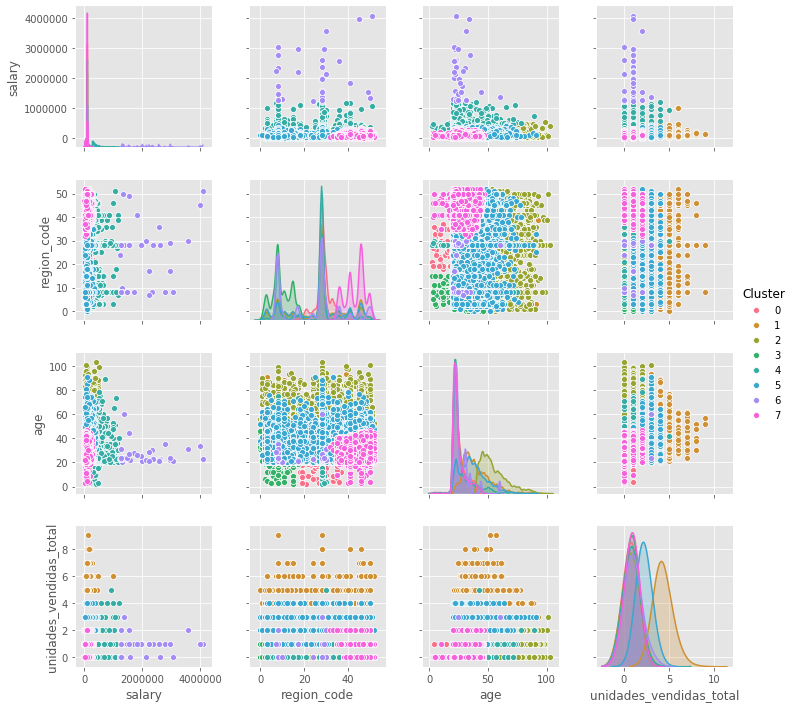

In [74]:
sns.pairplot(reduce_df_products.sample(50000), vars=['salary', 'region_code', 'age','unidades_vendidas_total'], hue='Cluster', diag_kws={'bw': 0.8})
plt.savefig("SC_31.png")
plt.show()

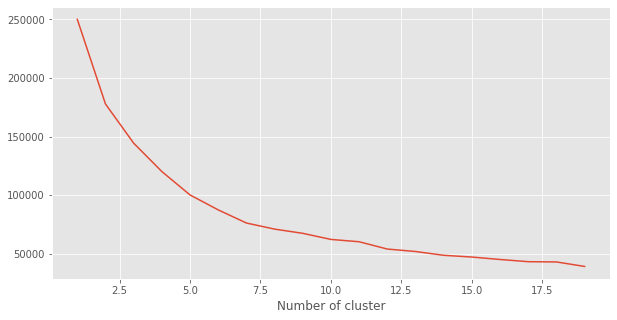

In [75]:
sse = {}
for k in range(1, 20):
    pipe = Pipeline(
            steps=[
                ('StandardScaler', StandardScaler()),
                ('KMeans', KMeans(n_clusters=k))
            ]
        ).fit(reduce_df_products.sample(50000)[['salary', 'region_code', 'age','revenue_total','unidades_vendidas_total']])
    reduce_df_products.sample(50000)['Cluster'] = pipe['KMeans'].labels_
    sse[k] = pipe['KMeans'].inertia_
    
plt.figure(figsize=(10, 5))
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel('Number of cluster')
plt.savefig("SC_32.png")
plt.show()